In [3]:
import numpy as np
import ot  
from scipy.spatial.distance import cdist
import time
import matplotlib.pyplot as plt

### generate synthetic data

class_1 (Normal μ=2.37, σ=0.60): 13 samples
class_2 (Normal μ=2.61, σ=0.54): 15 samples
class_3 (Normal μ=2.74, σ=0.55): 15 samples
class_4 (Normal μ=2.46, σ=0.56): 16 samples
class_5 (Normal μ=2.01, σ=0.58): 15 samples
class_6 (Exponential λ=1.08): 11 samples
class_7 (Exponential λ=1.04): 11 samples
class_8 (Exponential λ=1.00): 13 samples
class_9 (Exponential λ=1.09): 17 samples
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00

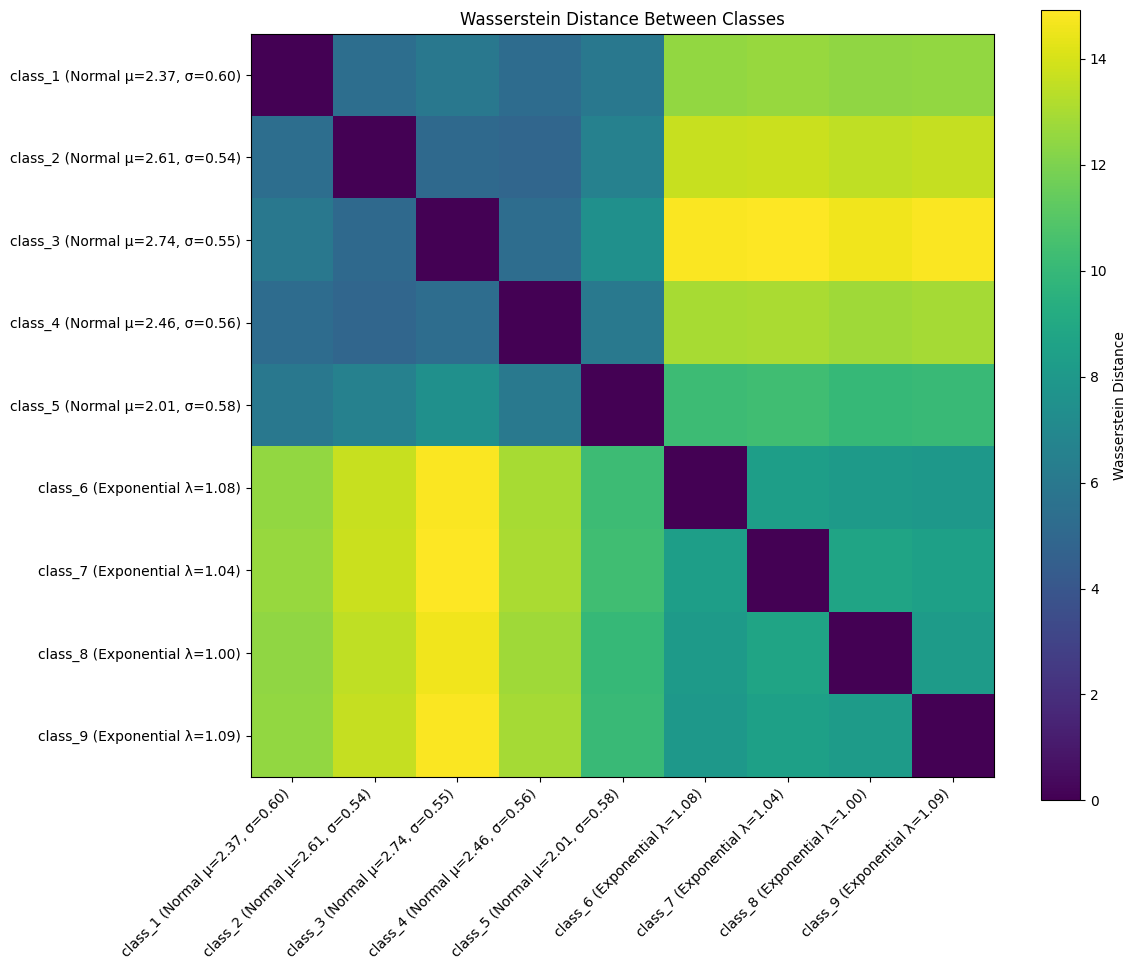

In [4]:
# Generate synthetic data
def generate_mixed_distribution_data():
    """
    Generate 9 classes: 
    - Classes 1-5: Normal distributions with varying mean and variance.
    - Classes 6-9: Exponential distributions with varying rate parameters.
    """
    data = {}
    sequence_length = 50  # Fixed length for each sample
    
    # Normal Distributions for Classes 1-5
    for i in range(1, 6):
        mean = np.random.uniform(2, 3) 
        std = np.random.uniform(0.5, 0.6)  
        n_samples = np.random.randint(11, 19)  
        class_data = [np.random.normal(mean, std, sequence_length) for _ in range(n_samples)]
        data[f'class_{i} (Normal μ={mean:.2f}, σ={std:.2f})'] = np.array(class_data)
    
    # Exponential Distributions for Classes 6-9
    for i in range(6, 10):
        rate = np.random.uniform(1, 1.1)  
        n_samples = np.random.randint(11, 19)  
        class_data = [np.random.exponential(1/rate, sequence_length) for _ in range(n_samples)]
        data[f'class_{i} (Exponential λ={rate:.2f})'] = np.array(class_data)
    
    return data


In [5]:
np.random.seed(42)
toy_data = generate_mixed_distribution_data()

# 
for class_name, class_data in toy_data.items():
    print(f"{class_name}: {len(class_data)} samples")

class_1 (Normal μ=2.37, σ=0.60): 13 samples
class_2 (Normal μ=2.61, σ=0.54): 15 samples
class_3 (Normal μ=2.74, σ=0.55): 15 samples
class_4 (Normal μ=2.46, σ=0.56): 16 samples
class_5 (Normal μ=2.01, σ=0.58): 15 samples
class_6 (Exponential λ=1.08): 11 samples
class_7 (Exponential λ=1.04): 11 samples
class_8 (Exponential λ=1.00): 13 samples
class_9 (Exponential λ=1.09): 17 samples


### distance calculation

larger distance means smaller similarity

In [ ]:
# Compute Wasserstein Distance Between Two Classes
def wasserstein_distance_class_pair(class_data_1, class_data_2):
    """
    Compute Wasserstein distance between two classes with fixed-length sequences.
    """
    # Compute pairwise ground distance matrix
    M = cdist(class_data_1, class_data_2, metric='euclidean')
    
    # Uniform weights for both distributions
    a = np.ones(len(class_data_1)) / len(class_data_1)
    b = np.ones(len(class_data_2)) / len(class_data_2)
    
    # Compute Wasserstein distance (Sinkhorn for efficiency)
    start_time = time.time()
    wasserstein_distance = ot.sinkhorn2(a, b, M, reg=0.1)  
    end_time = time.time()
    
    print(f"Time taken: {end_time - start_time:.2f} seconds")
    return wasserstein_distance

# Compute Distance Matrix Between All Classes
def compute_distance_matrix(data):
    """
    Compute pairwise Wasserstein distances between all classes.
    """
    class_names = list(data.keys())
    n_classes = len(class_names)
    distance_matrix = np.zeros((n_classes, n_classes))
    
    for i in range(n_classes):
        for j in range(i + 1, n_classes):
            distance = wasserstein_distance_class_pair(data[class_names[i]], data[class_names[j]])
            distance_matrix[i, j] = distance
            distance_matrix[j, i] = distance  # Symmetric matrix
    
    return distance_matrix, class_names

# Visualization
def plot_distance_matrix(distance_matrix, class_names):
    """
    Plot a heatmap of the Wasserstein distance matrix.
    """
    plt.figure(figsize=(12, 10))
    plt.imshow(distance_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Wasserstein Distance')
    plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45, ha='right')
    plt.yticks(ticks=np.arange(len(class_names)), labels=class_names)
    plt.title('Wasserstein Distance Between Classes')
    plt.tight_layout()
    plt.show()

In [7]:
distance_matrix, class_names = compute_distance_matrix(toy_data)

Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.01 seconds
Time taken: 0.00 seconds
Time taken: 0.00 seconds
Time taken: 0.01 seconds
Time taken: 0.00 seconds
Time taken: 0.01 seconds


In [8]:
distance_matrix # smaller distance means larger similarity
# you may adjust it e.g. by normalization

array([[ 0.        ,  5.39211791,  5.95973803,  5.28490219,  5.96715132,
        12.49072242, 12.644611  , 12.42162824, 12.49466856],
       [ 5.39211791,  0.        ,  5.10703589,  4.89826878,  6.55044947,
        13.64251052, 13.74641421, 13.49852616, 13.62939655],
       [ 5.95973803,  5.10703589,  0.        ,  5.31171973,  7.51732868,
        14.82213862, 14.91994049, 14.62582566, 14.80400893],
       [ 5.28490219,  4.89826878,  5.31171973,  0.        ,  6.03169013,
        12.96290247, 13.05484174, 12.78518527, 12.93120728],
       [ 5.96715132,  6.55044947,  7.51732868,  6.03169013,  0.        ,
        10.2310617 , 10.3521025 , 10.01665155, 10.08488436],
       [12.49072242, 13.64251052, 14.82213862, 12.96290247, 10.2310617 ,
         0.        ,  8.35377503,  8.15739589,  7.97978218],
       [12.644611  , 13.74641421, 14.91994049, 13.05484174, 10.3521025 ,
         8.35377503,  0.        ,  8.71768705,  8.4779678 ],
       [12.42162824, 13.49852616, 14.62582566, 12.78518527, 10

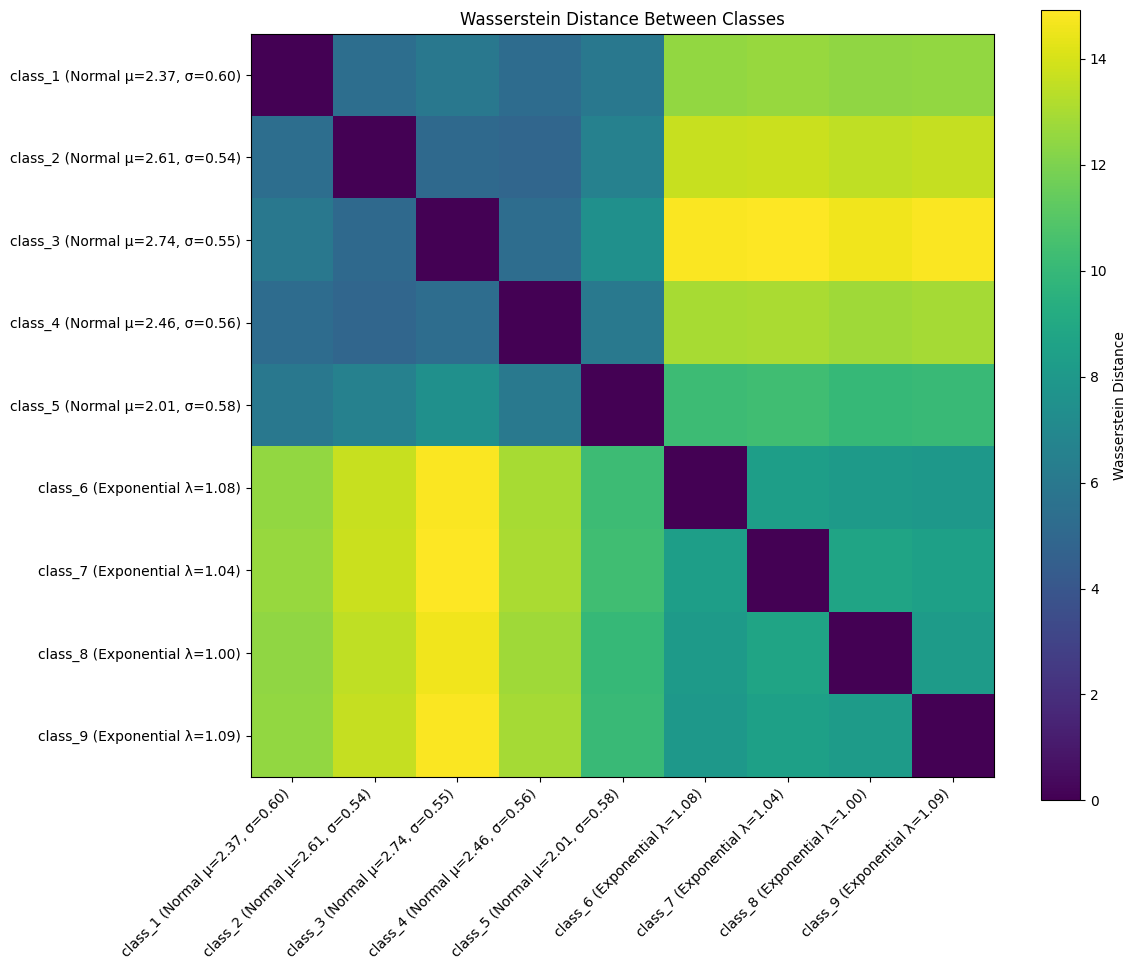

In [9]:
plot_distance_matrix(distance_matrix, class_names)

### distance of item itself

Pre-defined distance between items based on prompts and rubric. pls adjust it based on your expert knowledge if needed

In [ ]:
dis_item = [
    [0, 0.2, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
    [0.2, 0, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
    [0.8, 0.8, 0, 0.4, 0.8, 0.8, 0.8, 0.8, 0.8],
    [0.8, 0.8, 0.4, 0, 0.8, 0.8, 0.8, 0.8, 0.8],
    [0.8, 0.8, 0.8, 0.8, 0, 0.2, 0.5, 0.5, 0.5],
    [0.8, 0.8, 0.8, 0.8, 0.2, 0, 0.5, 0.5, 0.5],
    [0.8, 0.8, 0.8, 0.8, 0.5, 0.5, 0, 0.2, 0.2],
    [0.8, 0.8, 0.8, 0.8, 0.5, 0.5, 0.2, 0, 0.2],
    [0.8, 0.8, 0.8, 0.8, 0.5, 0.5, 0.2, 0.2, 0]
]

$dis_{all} = dis_{feature} + \alpha dis_{item}$

alpha controls the trade-off between the distance calculated based on features and item descriptions. 